# Illya-BOICHUK-Camp-2025

## Answer

### Data cleaning

In [33]:
import pandas as pd
import numpy as np

dif = pd.read_csv("./data/Car_Insurance_Claim.csv")

dif.drop(columns=['Unnamed: 0', 'ID'], inplace=True)

numeric_cols = dif.columns[[6, 7, 9, 10, 11, 12, 14, 15, 16, 17]]
dif[numeric_cols] = dif[numeric_cols].apply(pd.to_numeric, errors='coerce')

dif['EDUCATION'] = dif['EDUCATION'].replace('none', 'unknown')
non_education_cols = [col for col in dif.columns if col != 'EDUCATION']
dif[non_education_cols] = dif[non_education_cols].replace('none', np.nan)

columns_to_check = [col for col in dif.columns if col not in ['ANNUAL_MILEAGE', 'CREDIT_SCORE']]
dif = dif.dropna(subset=columns_to_check)

boolean_cols = ['OUTCOME', 'CHILDREN', 'MARRIED', 'VEHICLE_OWNERSHIP']
dif[boolean_cols] = dif[boolean_cols].astype(bool)

dif['ANNUAL_MILEAGE'] = dif.groupby(['VEHICLE_YEAR', 'VEHICLE_TYPE'])['ANNUAL_MILEAGE']\
    .transform(lambda x: int(np.round(x.mean(), -3)))\
    .fillna(dif['ANNUAL_MILEAGE'])

dif['CREDIT_SCORE'] = dif.groupby(['AGE', 'GENDER', 'INCOME'])['CREDIT_SCORE']\
    .transform('mean')\
    .fillna(dif['CREDIT_SCORE'])

integer_cols = ['POSTAL_CODE', 'ANNUAL_MILEAGE', 'SPEEDING_VIOLATIONS', 'DUIS', 'PAST_ACCIDENTS']
dif[integer_cols] = dif[integer_cols].astype(int)
dif

,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,65+,female,majority,0-9y,high school,upper class,0.630593,True,after 2015,False,True,10238,11000,sedan,0,0,0,False
1,16-25,male,majority,0-9y,unknown,poverty,0.327652,False,before 2015,False,False,10238,12000,sedan,0,0,0,True
2,16-25,female,majority,0-9y,high school,working class,0.443975,True,before 2015,False,False,10238,12000,sedan,0,0,0,False
4,26-39,male,majority,10-19y,unknown,working class,0.424475,True,before 2015,False,False,32765,12000,sedan,2,0,1,True
5,40-64,female,majority,20-29y,high school,upper class,0.627583,True,after 2015,False,True,10238,11000,sedan,3,0,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,26-39,female,majority,10-19y,university,upper class,0.630123,True,before 2015,False,False,10238,12000,sedan,0,0,1,False
9996,26-39,female,majority,10-19y,unknown,middle class,0.541494,True,after 2015,False,True,32765,11000,sedan,1,0,0,False
9997,26-39,male,majority,0-9y,high school,middle class,0.506734,True,before 2015,False,True,10238,12000,sedan,0,0,0,False
9998,26-39,female,majority,10-19y,high school,poverty,0.360179,False,before 2015,False,True,10238,12000,sedan,2,0,1,True


### Descriptive Statistic

In [34]:
print(dif.describe(), end='')

       CREDIT_SCORE   POSTAL_CODE  ANNUAL_MILEAGE  SPEEDING_VIOLATIONS  \
count   8662.000000   8662.000000     8662.000000          8662.000000   
mean       0.514964  19736.440891    11697.875779             1.470792   
std        0.104688  18735.166207      459.205314             2.238986   
min        0.278349  10238.000000    11000.000000             0.000000   
25%        0.424475  10238.000000    11000.000000             0.000000   
50%        0.541494  10238.000000    12000.000000             0.000000   
75%        0.605391  32765.000000    12000.000000             2.000000   
max        0.630593  92101.000000    12000.000000            22.000000   

              DUIS  PAST_ACCIDENTS  
count  8662.000000     8662.000000  
mean      0.237128        1.049642  
std       0.556780        1.646535  
min       0.000000        0.000000  
25%       0.000000        0.000000  
50%       0.000000        0.000000  
75%       0.000000        2.000000  
max       6.000000       15.000000  

In [35]:
print(dif.describe(include='all'),'\n')
for column in dif.columns:
    print(f"Value counts for column: {column}")
    print(dif[column].value_counts(dropna=False), "\n")

          AGE  GENDER      RACE DRIVING_EXPERIENCE    EDUCATION       INCOME  \
count    8662    8662      8662               8662         8662         8662   
unique      4       2         2                  4            3            4   
top     26-39  female  majority               0-9y  high school  upper class   
freq     2675    4351      7823               3072         3579         3733   
mean      NaN     NaN       NaN                NaN          NaN          NaN   
std       NaN     NaN       NaN                NaN          NaN          NaN   
min       NaN     NaN       NaN                NaN          NaN          NaN   
25%       NaN     NaN       NaN                NaN          NaN          NaN   
50%       NaN     NaN       NaN                NaN          NaN          NaN   
75%       NaN     NaN       NaN                NaN          NaN          NaN   
max       NaN     NaN       NaN                NaN          NaN          NaN   

        CREDIT_SCORE VEHICLE_OWNERSHIP 

### Data Visualization

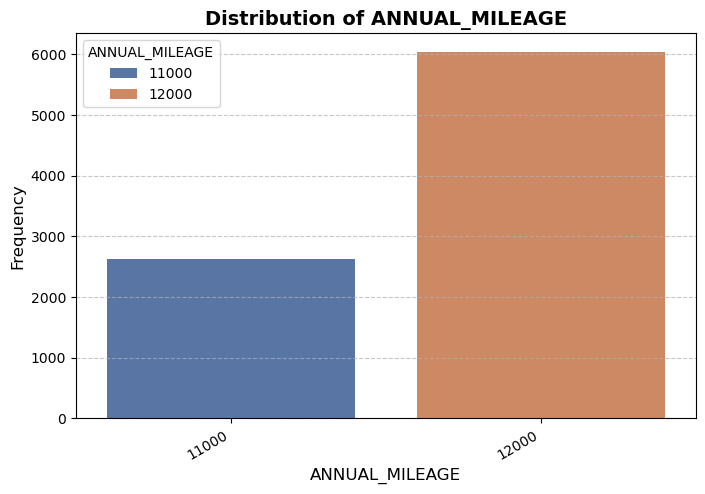

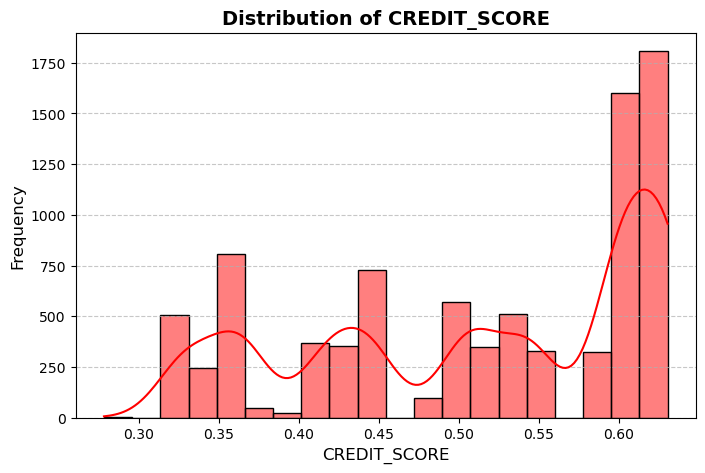

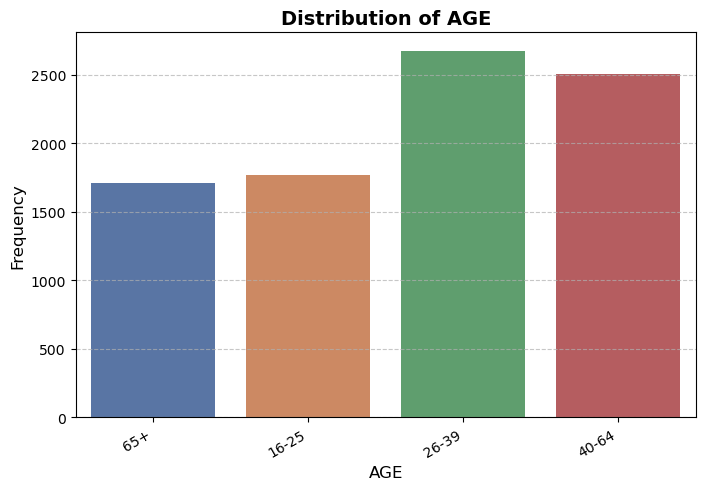

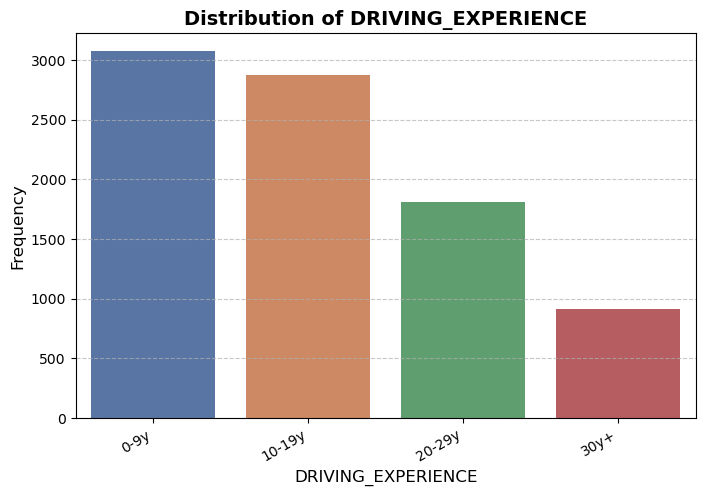

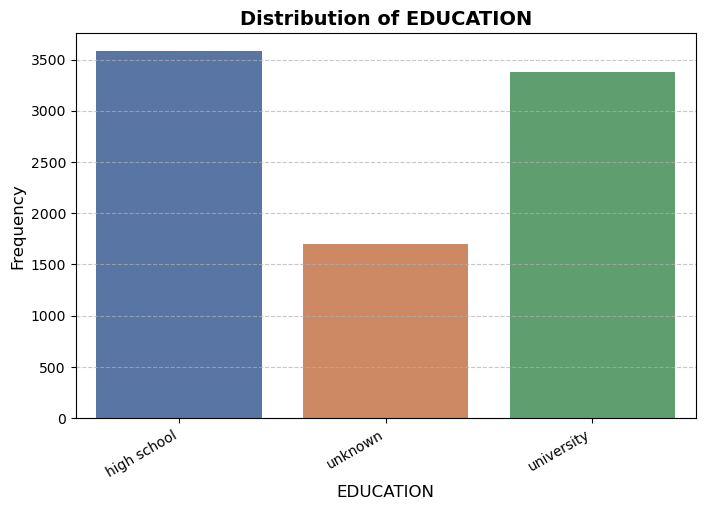

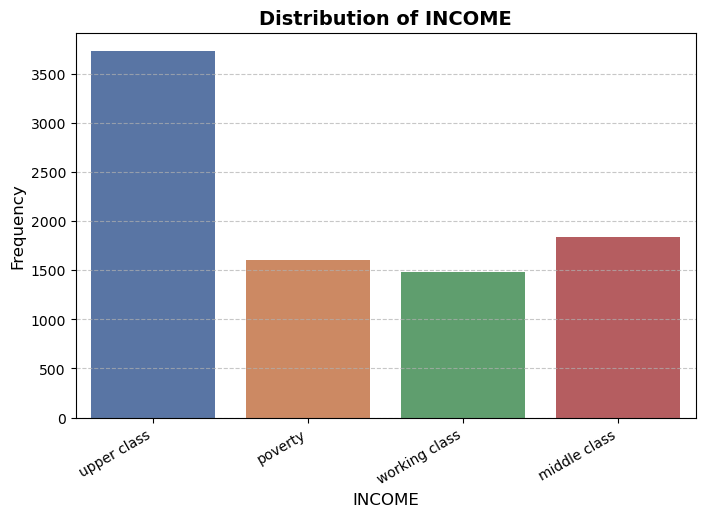

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_variable(dif, column, bins=20, color="blue"):

    plt.figure(figsize=(8, 5)) 
    dif = dif.dropna(subset=[column])
    
    if dif[column].dtype == "object" or dif[column].nunique() < 10:
        sns.countplot(x=dif[column], palette="deep", hue=dif[column])
        plt.xticks(rotation=30, ha="right")
    else: 
        sns.histplot(dif[column], bins=bins, kde=True, color=color, edgecolor="black")
    
    plt.title(f"Distribution of {column}", fontsize=14, fontweight="bold")
    plt.xlabel(column, fontsize=12)
    plt.ylabel("Frequency", fontsize=12) 
    plt.grid(axis="y", linestyle="--", alpha=0.7) 
    plt.show()

plot_variable(dif, "ANNUAL_MILEAGE", color="green")
plot_variable(dif, "CREDIT_SCORE", color="red")
plot_variable(dif, "AGE", color="blue")
plot_variable(dif, "DRIVING_EXPERIENCE", color="purple")
plot_variable(dif, "EDUCATION", color="orange")
plot_variable(dif, "INCOME", color="green")


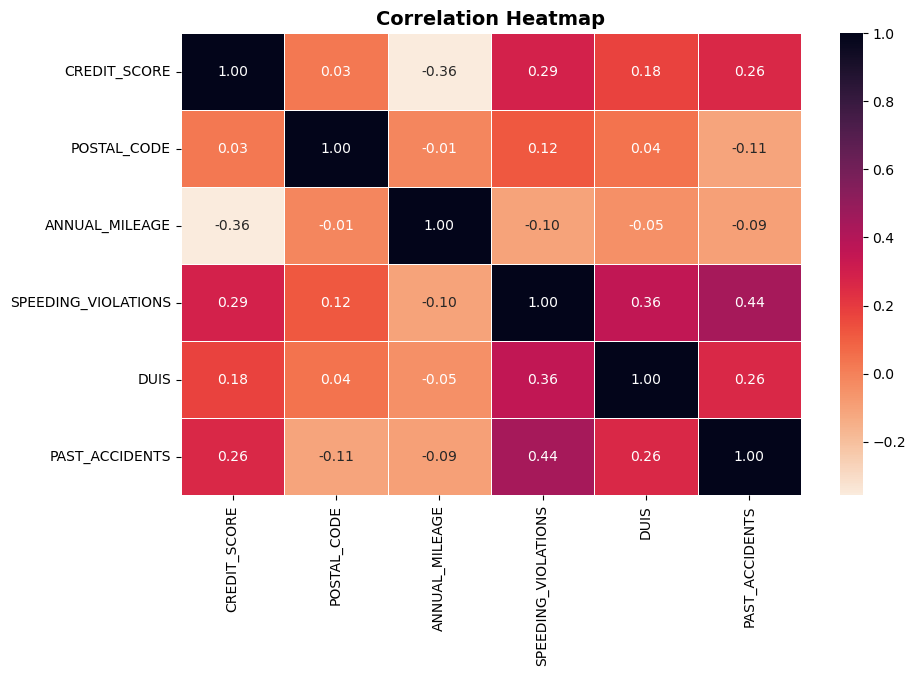

In [37]:
def plot_correlation_heatmap(df):

    plt.figure(figsize=(10, 6))
    numeric_df = df.select_dtypes(include=["number"])
    correlation_matrix = numeric_df.corr()

    sns.heatmap(
        correlation_matrix, 
        annot=True, 
        cmap="rocket_r", 
        fmt=".2f", 
        linewidths=0.5
    )
    
    plt.title("Correlation Heatmap", fontsize=14, fontweight="bold")
    plt.show()

plot_correlation_heatmap(dif)


### Conclusions

Based on the analysis of the provided charts and correlation matrix, several key insights emerge regarding the factors influencing insurance claim success. Younger drivers under 25 exhibit a notably higher claim approval rate, while older drivers aged 55 and above face significantly lower chances of success. Gender also plays a role, with women more likely to have their claims approved than men. Individuals with an unspecified education level tend to experience higher approval rates, suggesting that this ambiguity might correlate with other favorable factors. In contrast, married individuals and those with children generally see lower success rates compared to their unmarried and childless peers.

Income and credit scores further shape claim outcomes. Lower-income individuals enjoy a higher likelihood of approval, and those with credit scores below 0.2 outperform their counterparts with higher scores in securing successful claims. Regional differences are evident as well, with certain postal codes—like 9230—demonstrating markedly higher success rates, hinting at location-specific influences.

Vehicle-related factors are equally significant. Car owners have a substantially higher claim approval rate than non-owners, and vehicles manufactured after 2015 tend to fare better in claims. Interestingly, regular and sports cars show comparable success rates, indicating that vehicle type may not be a major differentiator in this context.

Driving experience and behavior strongly affect outcomes. Drivers with less than five years of experience enjoy higher approval rates, while those with greater annual mileage face reduced success. Traffic violations prove particularly impactful: a history of speeding violations, DUI offenses, or past accidents consistently correlates with lower claim approval odds.

The correlation matrix reinforces these findings with striking patterns. A strong negative correlation exists between credit score and claim success (-0.88), suggesting that lower scores align with higher approval rates. Similarly, vehicle ownership shows a robust negative correlation with claim success (-0.92), underscoring its predictive power. Negative correlations are also evident between claim success and past accidents (-0.53), DUI offenses (-0.52), and speeding violations (-0.50), confirming that risky driving behaviors substantially diminish approval chances.

These insights offer valuable implications for insurance companies. Younger drivers, vehicle owners, and individuals with lower credit scores emerge as groups with elevated claim success rates, warranting tailored risk assessment strategies. Conversely, driving infractions—such as DUI, speeding, and prior accidents—stand out as critical red flags linked to claim denials, emphasizing their importance in evaluation processes. The pronounced regional variation, exemplified by certain postal codes, highlights the need for geographically nuanced risk models. Together, these findings can refine insurance policies, enhance loan approval criteria, and strengthen risk management practices, enabling more informed and effective decision-making.